# L10 - The CMB Power Spectrum

This notebook uses the CAMB software to simulate how the SMB power spectrum would look given different cosmological parameters.

If you want to use it yourself on your own machine, you'll need to install the CAMB python software. It requires the gfortran compiler, so you'd have to install that first. Once you've installed the gfortran compiler, CAMB can be easily installed using pip3:

``` pip3 install camb --user ```

In [ ]:
%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
#Check that CAMB has been imported:
print('CAMB successfully imported; version: %s '%camb.__version__)

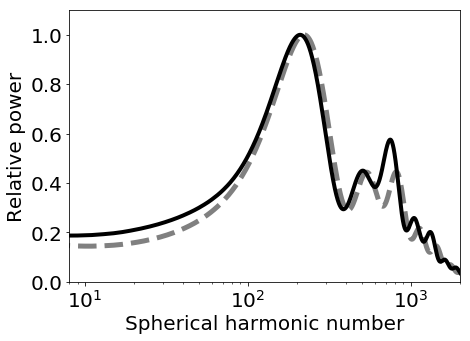

In [21]:
#Generate a class to hold some parameters:
bmpars = camb.CAMBparams()

'''Define the cosmological parameters. In CAMB, input parameters are given in physical densities,
rather than density parameters we're familiar with from the lectures. Converting between the two is
easy, however. Physical density is equal to (density parameter)*(h^2), where h = H_0/100.

ombh2: Omega_Baryons
omch2: Omega_Dark_Matter
omk: Curvature parameter
IMPORTANT NOTE: The Curvature parameter is NOT kappa (k) from the lectures. Instead, it is: -(k c^2)/(H0^2 R_0^2).
As such, a negative omk actually corresponds to a positive curvature!

Finally, CAMB calculates the Dark Energy energy density from the combination of ombh2, omch2, and omk)
'''

h = 0.68
h2 = h**2

#The Benchmark Model:
bmpars.set_cosmology(H0=h*100., ombh2=0.05*h2, omch2=0.26*h2, omk=0)
#Don't worry about the next line, it's just needed to get CAMB to work:
bmpars.InitPower.set_params(ns=0.965, r=0)

#Now generate our model universe:
bmresults = camb.get_results(bmpars)

#Extract the CMB power spectrum from our model universe:
bmpowers = bmresults.get_cmb_power_spectra(bmpars, CMB_unit='muK')
bmCL=bmpowers['unlensed_scalar']

#Generate a set of ls (i.e., spherical harmonic coefficients) to plot against:
bmls = np.arange(bmCL.shape[0])

#Now plot our model:
plt.figure(1, figsize=[7,5])
plt.axis([8,2000,0,1.1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Spherical harmonic number', fontsize=20)
plt.ylabel('Relative power', fontsize=20)
plt.xscale('log')
plt.plot(bmls, bmCL[:,0]/np.max(bmCL[:,0]), '--', color='gray', linewidth=5, label='Benchmark')

#Generate a new model to compare to The Benchmark Model
pars = camb.CAMBparams()
pars.set_cosmology(H0=h*100., ombh2=0.05*h2, omch2=0.52*h2, omk=0.0)
pars.InitPower.set_params(ns=0.965, r=0)
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
CL=powers['unlensed_scalar']
ls = np.arange(CL.shape[0])

plt.plot(ls, CL[:,0]/np.max(CL[:,0]), color='k', linewidth=4, label='Model')
plt.show()